In [1]:
import pickle
import os
import numpy as np
#import pandas as pd
#import music21 as m21
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime
import gc

In [2]:
import functionDefs as fd

In [3]:
if (str(input("Do You Want to use one GPU? y/[n]: ")).startswith("y")):
    print(tf.config.experimental.list_physical_devices('GPU'))
    fd.chooseOneGPU(int(input("Choose the ID of the GPU you want to use: ")))

Do You Want to use one GPU? y/[n]: y
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU')]
Choose the ID of the GPU you want to use: 1
3 Physical GPUs, 1 Logical GPU


In [4]:
items = fd.openFolderSplit('databases/nesmdb24_seprsco/train/', 1024, True, 128)
items.shape

added: 226_MegaMan3_08_09TopManStage.seprsco.pkl notes: 0 - 1023
added: 226_MegaMan3_08_09TopManStage.seprsco.pkl notes: 128 - 1151
added: 396_YsIII_WanderersfromYs_08_09BeCareful.seprsco.pkl notes: 0 - 1023
added: 396_YsIII_WanderersfromYs_08_09BeCareful.seprsco.pkl notes: 128 - 1151
added: 396_YsIII_WanderersfromYs_08_09BeCareful.seprsco.pkl notes: 256 - 1279
added: 396_YsIII_WanderersfromYs_08_09BeCareful.seprsco.pkl notes: 384 - 1407
added: 396_YsIII_WanderersfromYs_08_09BeCareful.seprsco.pkl notes: 512 - 1535
added: 396_YsIII_WanderersfromYs_08_09BeCareful.seprsco.pkl notes: 640 - 1663
added: 396_YsIII_WanderersfromYs_08_09BeCareful.seprsco.pkl notes: 768 - 1791
added: 396_YsIII_WanderersfromYs_08_09BeCareful.seprsco.pkl notes: 896 - 1919
added: 396_YsIII_WanderersfromYs_08_09BeCareful.seprsco.pkl notes: 1024 - 2047
added: 396_YsIII_WanderersfromYs_08_09BeCareful.seprsco.pkl notes: 1152 - 2175
added: 396_YsIII_WanderersfromYs_08_09BeCareful.seprsco.pkl notes: 1280 - 2303
added: 39

added: 091_DragonWarriorIV_12_13BattleFortheGlory.seprsco.pkl notes: 0 - 1023
added: 091_DragonWarriorIV_12_13BattleFortheGlory.seprsco.pkl notes: 128 - 1151
added: 091_DragonWarriorIV_12_13BattleFortheGlory.seprsco.pkl notes: 256 - 1279
added: 031_BioMiracleBokutteUpa_08_09Climbing.seprsco.pkl notes: 0 - 1023
added: 031_BioMiracleBokutteUpa_08_09Climbing.seprsco.pkl notes: 128 - 1151
added: 031_BioMiracleBokutteUpa_08_09Climbing.seprsco.pkl notes: 256 - 1279
added: 031_BioMiracleBokutteUpa_08_09Climbing.seprsco.pkl notes: 384 - 1407
added: 031_BioMiracleBokutteUpa_08_09Climbing.seprsco.pkl notes: 512 - 1535
added: 397_YsII_AncientYsVanishedTheFinalChapter_15_16TenderPeople.seprsco.pkl notes: 0 - 1023
added: 397_YsII_AncientYsVanishedTheFinalChapter_15_16TenderPeople.seprsco.pkl notes: 128 - 1151
added: 397_YsII_AncientYsVanishedTheFinalChapter_15_16TenderPeople.seprsco.pkl notes: 256 - 1279
added: 310_StarWars_TheEmpireStrikesBack_00_01Title.seprsco.pkl notes: 0 - 1023
added: 310_Star

added: 201_LanMaster_00_01Title.seprsco.pkl notes: 0 - 1023
added: 201_LanMaster_00_01Title.seprsco.pkl notes: 128 - 1151
added: 201_LanMaster_00_01Title.seprsco.pkl notes: 256 - 1279
added: 201_LanMaster_00_01Title.seprsco.pkl notes: 384 - 1407
added: 201_LanMaster_00_01Title.seprsco.pkl notes: 512 - 1535
added: 201_LanMaster_00_01Title.seprsco.pkl notes: 640 - 1663
added: 201_LanMaster_00_01Title.seprsco.pkl notes: 768 - 1791
added: 313_Strider_03_04Kazakh.seprsco.pkl notes: 0 - 1023
added: 313_Strider_03_04Kazakh.seprsco.pkl notes: 128 - 1151
added: 313_Strider_03_04Kazakh.seprsco.pkl notes: 256 - 1279
added: 254_Nobunaga_sAmbitionII_15_16ToDistantFriendsUnification.seprsco.pkl notes: 0 - 1023
added: 254_Nobunaga_sAmbitionII_15_16ToDistantFriendsUnification.seprsco.pkl notes: 128 - 1151
added: 254_Nobunaga_sAmbitionII_15_16ToDistantFriendsUnification.seprsco.pkl notes: 256 - 1279
added: 254_Nobunaga_sAmbitionII_15_16ToDistantFriendsUnification.seprsco.pkl notes: 384 - 1407
added: 25

added: 191_Kirby_sAdventure_20_21UnderwaterLevel.seprsco.pkl notes: 0 - 1023
added: 191_Kirby_sAdventure_20_21UnderwaterLevel.seprsco.pkl notes: 128 - 1151
added: 191_Kirby_sAdventure_20_21UnderwaterLevel.seprsco.pkl notes: 256 - 1279
added: 191_Kirby_sAdventure_20_21UnderwaterLevel.seprsco.pkl notes: 384 - 1407
added: 191_Kirby_sAdventure_20_21UnderwaterLevel.seprsco.pkl notes: 512 - 1535
added: 191_Kirby_sAdventure_20_21UnderwaterLevel.seprsco.pkl notes: 640 - 1663
added: 191_Kirby_sAdventure_20_21UnderwaterLevel.seprsco.pkl notes: 768 - 1791
added: 119_FinalFantasyIII_06_07MyHomeTown.seprsco.pkl notes: 0 - 1023
added: 119_FinalFantasyIII_06_07MyHomeTown.seprsco.pkl notes: 128 - 1151
added: 119_FinalFantasyIII_06_07MyHomeTown.seprsco.pkl notes: 256 - 1279
added: 119_FinalFantasyIII_06_07MyHomeTown.seprsco.pkl notes: 384 - 1407
added: 119_FinalFantasyIII_06_07MyHomeTown.seprsco.pkl notes: 512 - 1535
added: 119_FinalFantasyIII_06_07MyHomeTown.seprsco.pkl notes: 640 - 1663
added: 118_Fi

added: 064_DeepDungeonII_YuushinoMonshou_09_10DungeonFloor3.seprsco.pkl notes: 2432 - 3455
added: 064_DeepDungeonII_YuushinoMonshou_09_10DungeonFloor3.seprsco.pkl notes: 2560 - 3583
added: 064_DeepDungeonII_YuushinoMonshou_09_10DungeonFloor3.seprsco.pkl notes: 2688 - 3711
added: 064_DeepDungeonII_YuushinoMonshou_09_10DungeonFloor3.seprsco.pkl notes: 2816 - 3839
added: 064_DeepDungeonII_YuushinoMonshou_09_10DungeonFloor3.seprsco.pkl notes: 2944 - 3967
added: 064_DeepDungeonII_YuushinoMonshou_09_10DungeonFloor3.seprsco.pkl notes: 3072 - 4095
added: 064_DeepDungeonII_YuushinoMonshou_09_10DungeonFloor3.seprsco.pkl notes: 3200 - 4223
added: 064_DeepDungeonII_YuushinoMonshou_09_10DungeonFloor3.seprsco.pkl notes: 3328 - 4351
added: 064_DeepDungeonII_YuushinoMonshou_09_10DungeonFloor3.seprsco.pkl notes: 3456 - 4479
added: 064_DeepDungeonII_YuushinoMonshou_09_10DungeonFloor3.seprsco.pkl notes: 3584 - 4607
added: 064_DeepDungeonII_YuushinoMonshou_09_10DungeonFloor3.seprsco.pkl notes: 3712 - 4735

added: 387_Wizardry_ProvingGroundsofTheMadOverlord_06_07TempleofCant.seprsco.pkl notes: 0 - 1023
added: 387_Wizardry_ProvingGroundsofTheMadOverlord_06_07TempleofCant.seprsco.pkl notes: 128 - 1151
added: 387_Wizardry_ProvingGroundsofTheMadOverlord_06_07TempleofCant.seprsco.pkl notes: 256 - 1279
added: 046_CastlevaniaIII_Dracula_sCurse_12_13Nightmare.seprsco.pkl notes: 0 - 1023
added: 204_Lemmings_06_07Tim7.seprsco.pkl notes: 0 - 1023
added: 204_Lemmings_06_07Tim7.seprsco.pkl notes: 128 - 1151
added: 204_Lemmings_06_07Tim7.seprsco.pkl notes: 256 - 1279
added: 204_Lemmings_06_07Tim7.seprsco.pkl notes: 384 - 1407
added: 398_Ys_AncientYsVanishedOmen_04_05FirstStepTowardsWars.seprsco.pkl notes: 0 - 1023
added: 398_Ys_AncientYsVanishedOmen_04_05FirstStepTowardsWars.seprsco.pkl notes: 128 - 1151
added: 398_Ys_AncientYsVanishedOmen_04_05FirstStepTowardsWars.seprsco.pkl notes: 256 - 1279
added: 398_Ys_AncientYsVanishedOmen_04_05FirstStepTowardsWars.seprsco.pkl notes: 384 - 1407
added: 398_Ys_Anc

added: 396_YsIII_WanderersfromYs_06_07PreludetoTheAdventure.seprsco.pkl notes: 0 - 1023
added: 396_YsIII_WanderersfromYs_06_07PreludetoTheAdventure.seprsco.pkl notes: 128 - 1151
added: 157_HikariShinwa_PalutenanoKagami_08_09ThePalaceintheSky.seprsco.pkl notes: 0 - 1023
added: 157_HikariShinwa_PalutenanoKagami_08_09ThePalaceintheSky.seprsco.pkl notes: 128 - 1151
added: 140_GetsuFuumaDen_03_04GoGetsuFuuma.seprsco.pkl notes: 0 - 1023
added: 140_GetsuFuumaDen_03_04GoGetsuFuuma.seprsco.pkl notes: 128 - 1151
added: 140_GetsuFuumaDen_03_04GoGetsuFuuma.seprsco.pkl notes: 256 - 1279
added: 140_GetsuFuumaDen_03_04GoGetsuFuuma.seprsco.pkl notes: 384 - 1407
added: 140_GetsuFuumaDen_03_04GoGetsuFuuma.seprsco.pkl notes: 512 - 1535
added: 340_Tetris_01_02Technotris.seprsco.pkl notes: 0 - 1023
added: 340_Tetris_01_02Technotris.seprsco.pkl notes: 128 - 1151
added: 340_Tetris_01_02Technotris.seprsco.pkl notes: 256 - 1279
added: 123_Fire_nIce_20_21StaffRoll.seprsco.pkl notes: 0 - 1023
added: 123_Fire_nIc

added: 327_SuperStarForce_JikuurekinoHimitsu_03_04J4OvertureCave.seprsco.pkl notes: 0 - 1023
added: 327_SuperStarForce_JikuurekinoHimitsu_03_04J4OvertureCave.seprsco.pkl notes: 128 - 1151
added: 327_SuperStarForce_JikuurekinoHimitsu_03_04J4OvertureCave.seprsco.pkl notes: 256 - 1279
added: 122_FireEmblem_AnkokuRyutoHikarinoTsurugi_24_25BattleMap4LastMapPlayerSide.seprsco.pkl notes: 0 - 1023
added: 122_FireEmblem_AnkokuRyutoHikarinoTsurugi_24_25BattleMap4LastMapPlayerSide.seprsco.pkl notes: 128 - 1151
added: 122_FireEmblem_AnkokuRyutoHikarinoTsurugi_24_25BattleMap4LastMapPlayerSide.seprsco.pkl notes: 256 - 1279
added: 122_FireEmblem_AnkokuRyutoHikarinoTsurugi_24_25BattleMap4LastMapPlayerSide.seprsco.pkl notes: 384 - 1407
added: 122_FireEmblem_AnkokuRyutoHikarinoTsurugi_24_25BattleMap4LastMapPlayerSide.seprsco.pkl notes: 512 - 1535
added: 122_FireEmblem_AnkokuRyutoHikarinoTsurugi_24_25BattleMap4LastMapPlayerSide.seprsco.pkl notes: 640 - 1663
added: 122_FireEmblem_AnkokuRyutoHikarinoTsurug

added: 298_SolarJetman_HuntfortheGoldenWarpship_12_13OmebruGameplay.seprsco.pkl notes: 33280 - 34303
added: 298_SolarJetman_HuntfortheGoldenWarpship_12_13OmebruGameplay.seprsco.pkl notes: 33408 - 34431
added: 298_SolarJetman_HuntfortheGoldenWarpship_12_13OmebruGameplay.seprsco.pkl notes: 33536 - 34559
added: 298_SolarJetman_HuntfortheGoldenWarpship_12_13OmebruGameplay.seprsco.pkl notes: 33664 - 34687
added: 298_SolarJetman_HuntfortheGoldenWarpship_12_13OmebruGameplay.seprsco.pkl notes: 33792 - 34815
added: 298_SolarJetman_HuntfortheGoldenWarpship_12_13OmebruGameplay.seprsco.pkl notes: 33920 - 34943
added: 298_SolarJetman_HuntfortheGoldenWarpship_12_13OmebruGameplay.seprsco.pkl notes: 34048 - 35071
added: 298_SolarJetman_HuntfortheGoldenWarpship_12_13OmebruGameplay.seprsco.pkl notes: 34176 - 35199
added: 298_SolarJetman_HuntfortheGoldenWarpship_12_13OmebruGameplay.seprsco.pkl notes: 34304 - 35327
added: 298_SolarJetman_HuntfortheGoldenWarpship_12_13OmebruGameplay.seprsco.pkl notes: 3443

added: 228_MegaMan5_10_11ChargeManStage.seprsco.pkl notes: 0 - 1023
added: 228_MegaMan5_10_11ChargeManStage.seprsco.pkl notes: 128 - 1151
added: 228_MegaMan5_10_11ChargeManStage.seprsco.pkl notes: 256 - 1279
added: 228_MegaMan5_10_11ChargeManStage.seprsco.pkl notes: 384 - 1407
added: 228_MegaMan5_10_11ChargeManStage.seprsco.pkl notes: 512 - 1535
added: 228_MegaMan5_10_11ChargeManStage.seprsco.pkl notes: 640 - 1663
added: 115_FelixtheCat_03_04Level3.seprsco.pkl notes: 0 - 1023
added: 144_GingaDenshou_GalaxyOdyssey_00_01Prologue.seprsco.pkl notes: 0 - 1023
added: 144_GingaDenshou_GalaxyOdyssey_00_01Prologue.seprsco.pkl notes: 128 - 1151
added: 144_GingaDenshou_GalaxyOdyssey_00_01Prologue.seprsco.pkl notes: 256 - 1279
added: 144_GingaDenshou_GalaxyOdyssey_00_01Prologue.seprsco.pkl notes: 384 - 1407
added: 144_GingaDenshou_GalaxyOdyssey_00_01Prologue.seprsco.pkl notes: 512 - 1535
added: 144_GingaDenshou_GalaxyOdyssey_00_01Prologue.seprsco.pkl notes: 640 - 1663
added: 144_GingaDenshou_Galax

added: 277_RainbowIslands_TheStoryofBubbleBobble2_17_18EndingPart2.seprsco.pkl notes: 0 - 1023
added: 277_RainbowIslands_TheStoryofBubbleBobble2_17_18EndingPart2.seprsco.pkl notes: 128 - 1151
added: 277_RainbowIslands_TheStoryofBubbleBobble2_17_18EndingPart2.seprsco.pkl notes: 256 - 1279
added: 277_RainbowIslands_TheStoryofBubbleBobble2_17_18EndingPart2.seprsco.pkl notes: 384 - 1407
added: 277_RainbowIslands_TheStoryofBubbleBobble2_17_18EndingPart2.seprsco.pkl notes: 512 - 1535
added: 277_RainbowIslands_TheStoryofBubbleBobble2_17_18EndingPart2.seprsco.pkl notes: 640 - 1663
added: 277_RainbowIslands_TheStoryofBubbleBobble2_17_18EndingPart2.seprsco.pkl notes: 768 - 1791
added: 036_BombermanII_09_10BonusStageVSCompetitionBGM.seprsco.pkl notes: 0 - 1023
added: 036_BombermanII_09_10BonusStageVSCompetitionBGM.seprsco.pkl notes: 128 - 1151
added: 036_BombermanII_09_10BonusStageVSCompetitionBGM.seprsco.pkl notes: 256 - 1279
added: 036_BombermanII_09_10BonusStageVSCompetitionBGM.seprsco.pkl not

added: 255_NobunaganoYabou_BushouFuunroku_20_21HeartSenRikyuTeaCeremony.seprsco.pkl notes: 0 - 1023
added: 255_NobunaganoYabou_BushouFuunroku_20_21HeartSenRikyuTeaCeremony.seprsco.pkl notes: 128 - 1151
added: 255_NobunaganoYabou_BushouFuunroku_20_21HeartSenRikyuTeaCeremony.seprsco.pkl notes: 256 - 1279
added: 255_NobunaganoYabou_BushouFuunroku_20_21HeartSenRikyuTeaCeremony.seprsco.pkl notes: 384 - 1407
added: 255_NobunaganoYabou_BushouFuunroku_20_21HeartSenRikyuTeaCeremony.seprsco.pkl notes: 512 - 1535
added: 255_NobunaganoYabou_BushouFuunroku_20_21HeartSenRikyuTeaCeremony.seprsco.pkl notes: 640 - 1663
added: 255_NobunaganoYabou_BushouFuunroku_20_21HeartSenRikyuTeaCeremony.seprsco.pkl notes: 768 - 1791
added: 255_NobunaganoYabou_BushouFuunroku_20_21HeartSenRikyuTeaCeremony.seprsco.pkl notes: 896 - 1919
added: 255_NobunaganoYabou_BushouFuunroku_20_21HeartSenRikyuTeaCeremony.seprsco.pkl notes: 1024 - 2047
added: 255_NobunaganoYabou_BushouFuunroku_20_21HeartSenRikyuTeaCeremony.seprsco.pkl

added: 174_ImageFight_05_06LooseLooseLooseStage3.seprsco.pkl notes: 0 - 1023
added: 174_ImageFight_05_06LooseLooseLooseStage3.seprsco.pkl notes: 128 - 1151
added: 032_BioSenshiDan_IncreasertonoTatakai_02_03Stage1.seprsco.pkl notes: 0 - 1023
added: 032_BioSenshiDan_IncreasertonoTatakai_02_03Stage1.seprsco.pkl notes: 128 - 1151
added: 246_Mother_00_01Title.seprsco.pkl notes: 0 - 1023
added: 246_Mother_00_01Title.seprsco.pkl notes: 128 - 1151
added: 246_Mother_00_01Title.seprsco.pkl notes: 256 - 1279
added: 246_Mother_00_01Title.seprsco.pkl notes: 384 - 1407
added: 246_Mother_00_01Title.seprsco.pkl notes: 512 - 1535
added: 246_Mother_00_01Title.seprsco.pkl notes: 640 - 1663
added: 246_Mother_00_01Title.seprsco.pkl notes: 768 - 1791
added: 246_Mother_00_01Title.seprsco.pkl notes: 896 - 1919
added: 246_Mother_00_01Title.seprsco.pkl notes: 1024 - 2047
added: 246_Mother_00_01Title.seprsco.pkl notes: 1152 - 2175
added: 246_Mother_00_01Title.seprsco.pkl notes: 1280 - 2303
added: 246_Mother_00_0

added: 397_YsII_AncientYsVanishedTheFinalChapter_11_12Protecters.seprsco.pkl notes: 0 - 1023
added: 046_CastlevaniaIII_Dracula_sCurse_24_25Evergreen.seprsco.pkl notes: 0 - 1023
added: 046_CastlevaniaIII_Dracula_sCurse_24_25Evergreen.seprsco.pkl notes: 128 - 1151
added: 046_CastlevaniaIII_Dracula_sCurse_24_25Evergreen.seprsco.pkl notes: 256 - 1279
added: 046_CastlevaniaIII_Dracula_sCurse_24_25Evergreen.seprsco.pkl notes: 384 - 1407
added: 046_CastlevaniaIII_Dracula_sCurse_24_25Evergreen.seprsco.pkl notes: 512 - 1535
added: 047_CastlevaniaII_Simon_sQuest_08_09ARequiem.seprsco.pkl notes: 0 - 1023
added: 047_CastlevaniaII_Simon_sQuest_08_09ARequiem.seprsco.pkl notes: 128 - 1151
added: 047_CastlevaniaII_Simon_sQuest_08_09ARequiem.seprsco.pkl notes: 256 - 1279
added: 047_CastlevaniaII_Simon_sQuest_08_09ARequiem.seprsco.pkl notes: 384 - 1407
added: 047_CastlevaniaII_Simon_sQuest_08_09ARequiem.seprsco.pkl notes: 512 - 1535
added: 047_CastlevaniaII_Simon_sQuest_08_09ARequiem.seprsco.pkl notes: 

added: 233_MetalMax_00_01Title.seprsco.pkl notes: 0 - 1023
added: 233_MetalMax_00_01Title.seprsco.pkl notes: 128 - 1151
added: 139_GenpeiToumaden_ComputerBoardgame_09_10Ending.seprsco.pkl notes: 0 - 1023
added: 139_GenpeiToumaden_ComputerBoardgame_09_10Ending.seprsco.pkl notes: 128 - 1151
added: 139_GenpeiToumaden_ComputerBoardgame_09_10Ending.seprsco.pkl notes: 256 - 1279
added: 139_GenpeiToumaden_ComputerBoardgame_09_10Ending.seprsco.pkl notes: 384 - 1407
added: 139_GenpeiToumaden_ComputerBoardgame_09_10Ending.seprsco.pkl notes: 512 - 1535
added: 139_GenpeiToumaden_ComputerBoardgame_09_10Ending.seprsco.pkl notes: 640 - 1663
added: 100_Falsion_00_01TheFirstSpaceFightStage1BGM.seprsco.pkl notes: 0 - 1023
added: 325_SuperMarioWorld_08_09HauntedHouse.seprsco.pkl notes: 0 - 1023
added: 325_SuperMarioWorld_08_09HauntedHouse.seprsco.pkl notes: 128 - 1151
added: 325_SuperMarioWorld_08_09HauntedHouse.seprsco.pkl notes: 256 - 1279
added: 325_SuperMarioWorld_08_09HauntedHouse.seprsco.pkl notes:

added: 036_BombermanII_07_08Area6.seprsco.pkl notes: 0 - 1023
added: 036_BombermanII_07_08Area6.seprsco.pkl notes: 128 - 1151
added: 036_BombermanII_07_08Area6.seprsco.pkl notes: 256 - 1279
added: 036_BombermanII_07_08Area6.seprsco.pkl notes: 384 - 1407
added: 036_BombermanII_07_08Area6.seprsco.pkl notes: 512 - 1535
added: 036_BombermanII_07_08Area6.seprsco.pkl notes: 640 - 1663
added: 232_MetalGear_02_03BaseInfiltration.seprsco.pkl notes: 0 - 1023
added: 008_AfterBurnerII_03_04SuperStripe.seprsco.pkl notes: 0 - 1023
added: 008_AfterBurnerII_03_04SuperStripe.seprsco.pkl notes: 128 - 1151
added: 008_AfterBurnerII_03_04SuperStripe.seprsco.pkl notes: 256 - 1279
added: 008_AfterBurnerII_03_04SuperStripe.seprsco.pkl notes: 384 - 1407
added: 008_AfterBurnerII_03_04SuperStripe.seprsco.pkl notes: 512 - 1535
added: 008_AfterBurnerII_03_04SuperStripe.seprsco.pkl notes: 640 - 1663
added: 008_AfterBurnerII_03_04SuperStripe.seprsco.pkl notes: 768 - 1791
added: 008_AfterBurnerII_03_04SuperStripe.sep

added: 329_SwordMaster_04_05MapScreen.seprsco.pkl notes: 0 - 1023
added: 329_SwordMaster_04_05MapScreen.seprsco.pkl notes: 128 - 1151
added: 329_SwordMaster_04_05MapScreen.seprsco.pkl notes: 256 - 1279
added: 329_SwordMaster_04_05MapScreen.seprsco.pkl notes: 384 - 1407
added: 329_SwordMaster_04_05MapScreen.seprsco.pkl notes: 512 - 1535
added: 329_SwordMaster_04_05MapScreen.seprsco.pkl notes: 640 - 1663
added: 329_SwordMaster_04_05MapScreen.seprsco.pkl notes: 768 - 1791
added: 329_SwordMaster_04_05MapScreen.seprsco.pkl notes: 896 - 1919
added: 329_SwordMaster_04_05MapScreen.seprsco.pkl notes: 1024 - 2047
added: 329_SwordMaster_04_05MapScreen.seprsco.pkl notes: 1152 - 2175
added: 329_SwordMaster_04_05MapScreen.seprsco.pkl notes: 1280 - 2303
added: 329_SwordMaster_04_05MapScreen.seprsco.pkl notes: 1408 - 2431
added: 329_SwordMaster_04_05MapScreen.seprsco.pkl notes: 1536 - 2559
added: 329_SwordMaster_04_05MapScreen.seprsco.pkl notes: 1664 - 2687
added: 329_SwordMaster_04_05MapScreen.seprsc

added: 129_FreedomForce_11_12Stage3.seprsco.pkl notes: 0 - 1023
added: 129_FreedomForce_11_12Stage3.seprsco.pkl notes: 128 - 1151
added: 129_FreedomForce_11_12Stage3.seprsco.pkl notes: 256 - 1279
added: 129_FreedomForce_11_12Stage3.seprsco.pkl notes: 384 - 1407
added: 072_DonDokoDon_06_07Dungeon.seprsco.pkl notes: 0 - 1023
added: 072_DonDokoDon_06_07Dungeon.seprsco.pkl notes: 128 - 1151
added: 072_DonDokoDon_06_07Dungeon.seprsco.pkl notes: 256 - 1279
added: 072_DonDokoDon_06_07Dungeon.seprsco.pkl notes: 384 - 1407
added: 072_DonDokoDon_06_07Dungeon.seprsco.pkl notes: 512 - 1535
added: 298_SolarJetman_HuntfortheGoldenWarpship_26_27ShammyGenGameplay.seprsco.pkl notes: 0 - 1023
added: 298_SolarJetman_HuntfortheGoldenWarpship_26_27ShammyGenGameplay.seprsco.pkl notes: 128 - 1151
added: 298_SolarJetman_HuntfortheGoldenWarpship_26_27ShammyGenGameplay.seprsco.pkl notes: 256 - 1279
added: 298_SolarJetman_HuntfortheGoldenWarpship_26_27ShammyGenGameplay.seprsco.pkl notes: 384 - 1407
added: 298_So

added: 387_Wizardry_ProvingGroundsofTheMadOverlord_16_17Werdna.seprsco.pkl notes: 0 - 1023
added: 387_Wizardry_ProvingGroundsofTheMadOverlord_16_17Werdna.seprsco.pkl notes: 128 - 1151
added: 159_HinoToriHououhen_GaounoBouken_08_09HinoToriEnding.seprsco.pkl notes: 0 - 1023
added: 255_NobunaganoYabou_BushouFuunroku_24_25AsEternalasHeavenandEarthEnding.seprsco.pkl notes: 0 - 1023
added: 255_NobunaganoYabou_BushouFuunroku_24_25AsEternalasHeavenandEarthEnding.seprsco.pkl notes: 128 - 1151
added: 255_NobunaganoYabou_BushouFuunroku_24_25AsEternalasHeavenandEarthEnding.seprsco.pkl notes: 256 - 1279
added: 255_NobunaganoYabou_BushouFuunroku_24_25AsEternalasHeavenandEarthEnding.seprsco.pkl notes: 384 - 1407
added: 255_NobunaganoYabou_BushouFuunroku_24_25AsEternalasHeavenandEarthEnding.seprsco.pkl notes: 512 - 1535
added: 255_NobunaganoYabou_BushouFuunroku_24_25AsEternalasHeavenandEarthEnding.seprsco.pkl notes: 640 - 1663
added: 255_NobunaganoYabou_BushouFuunroku_24_25AsEternalasHeavenandEarthEnd

added: 397_YsII_AncientYsVanishedTheFinalChapter_01_02ToMakeTheEndofBattle.seprsco.pkl notes: 0 - 1023
added: 397_YsII_AncientYsVanishedTheFinalChapter_01_02ToMakeTheEndofBattle.seprsco.pkl notes: 128 - 1151
added: 397_YsII_AncientYsVanishedTheFinalChapter_01_02ToMakeTheEndofBattle.seprsco.pkl notes: 256 - 1279
added: 397_YsII_AncientYsVanishedTheFinalChapter_01_02ToMakeTheEndofBattle.seprsco.pkl notes: 384 - 1407
added: 397_YsII_AncientYsVanishedTheFinalChapter_01_02ToMakeTheEndofBattle.seprsco.pkl notes: 512 - 1535
added: 397_YsII_AncientYsVanishedTheFinalChapter_01_02ToMakeTheEndofBattle.seprsco.pkl notes: 640 - 1663
added: 397_YsII_AncientYsVanishedTheFinalChapter_01_02ToMakeTheEndofBattle.seprsco.pkl notes: 768 - 1791
added: 397_YsII_AncientYsVanishedTheFinalChapter_01_02ToMakeTheEndofBattle.seprsco.pkl notes: 896 - 1919
added: 397_YsII_AncientYsVanishedTheFinalChapter_01_02ToMakeTheEndofBattle.seprsco.pkl notes: 1024 - 2047
added: 397_YsII_AncientYsVanishedTheFinalChapter_01_02To

added: 344_TheGooniesII_03_04CavernTheme.seprsco.pkl notes: 0 - 1023
added: 344_TheGooniesII_03_04CavernTheme.seprsco.pkl notes: 128 - 1151
added: 344_TheGooniesII_03_04CavernTheme.seprsco.pkl notes: 256 - 1279
added: 344_TheGooniesII_03_04CavernTheme.seprsco.pkl notes: 384 - 1407
added: 344_TheGooniesII_03_04CavernTheme.seprsco.pkl notes: 512 - 1535
added: 344_TheGooniesII_03_04CavernTheme.seprsco.pkl notes: 640 - 1663
added: 138_Gargoyle_sQuestII_19_20Ending.seprsco.pkl notes: 0 - 1023
added: 144_GingaDenshou_GalaxyOdyssey_06_07Mylusthe1stSatellite.seprsco.pkl notes: 0 - 1023
added: 144_GingaDenshou_GalaxyOdyssey_06_07Mylusthe1stSatellite.seprsco.pkl notes: 128 - 1151
added: 144_GingaDenshou_GalaxyOdyssey_06_07Mylusthe1stSatellite.seprsco.pkl notes: 256 - 1279
added: 195_KonamiWaiWaiWorld_13_14KongStageBossBGM.seprsco.pkl notes: 0 - 1023
added: 103_FamicomGrandPrixII_3DHotRally_05_06MonsterDance.seprsco.pkl notes: 0 - 1023
added: 103_FamicomGrandPrixII_3DHotRally_05_06MonsterDance.se

added: 380_WaronWheels_10_11ResultsTheme.seprsco.pkl notes: 0 - 1023
added: 380_WaronWheels_10_11ResultsTheme.seprsco.pkl notes: 128 - 1151
added: 380_WaronWheels_10_11ResultsTheme.seprsco.pkl notes: 256 - 1279
added: 380_WaronWheels_10_11ResultsTheme.seprsco.pkl notes: 384 - 1407
added: 380_WaronWheels_10_11ResultsTheme.seprsco.pkl notes: 512 - 1535
added: 380_WaronWheels_10_11ResultsTheme.seprsco.pkl notes: 640 - 1663
added: 380_WaronWheels_10_11ResultsTheme.seprsco.pkl notes: 768 - 1791
added: 380_WaronWheels_10_11ResultsTheme.seprsco.pkl notes: 896 - 1919
added: 380_WaronWheels_10_11ResultsTheme.seprsco.pkl notes: 1024 - 2047
added: 380_WaronWheels_10_11ResultsTheme.seprsco.pkl notes: 1152 - 2175
added: 380_WaronWheels_10_11ResultsTheme.seprsco.pkl notes: 1280 - 2303
added: 380_WaronWheels_10_11ResultsTheme.seprsco.pkl notes: 1408 - 2431
added: 380_WaronWheels_10_11ResultsTheme.seprsco.pkl notes: 1536 - 2559
added: 380_WaronWheels_10_11ResultsTheme.seprsco.pkl notes: 1664 - 2687
ad

added: 195_KonamiWaiWaiWorld_17_18FinalStageBGM.seprsco.pkl notes: 0 - 1023
added: 195_KonamiWaiWaiWorld_17_18FinalStageBGM.seprsco.pkl notes: 128 - 1151
added: 195_KonamiWaiWaiWorld_17_18FinalStageBGM.seprsco.pkl notes: 256 - 1279
added: 195_KonamiWaiWaiWorld_17_18FinalStageBGM.seprsco.pkl notes: 384 - 1407
added: 311_StarshipHector_01_02History1.seprsco.pkl notes: 0 - 1023
added: 311_StarshipHector_01_02History1.seprsco.pkl notes: 128 - 1151
added: 311_StarshipHector_01_02History1.seprsco.pkl notes: 256 - 1279
added: 311_StarshipHector_01_02History1.seprsco.pkl notes: 384 - 1407
added: 339_Tetris_04_05Troika.seprsco.pkl notes: 0 - 1023
added: 339_Tetris_04_05Troika.seprsco.pkl notes: 128 - 1151
added: 339_Tetris_04_05Troika.seprsco.pkl notes: 256 - 1279
added: 339_Tetris_04_05Troika.seprsco.pkl notes: 384 - 1407
added: 050_ChaosWorld_15_16GettingRichQuickintheTownofTemptation.seprsco.pkl notes: 0 - 1023
added: 050_ChaosWorld_15_16GettingRichQuickintheTownofTemptation.seprsco.pkl note

(8423, 1024, 4)

In [5]:
itemsTest = fd.openFolderSplit('databases/nesmdb24_seprsco/test/', 1024, True, 128)
itemsTest.shape

added: 286_Rygar_11_12SagilasCaveJPVersion.seprsco.pkl notes: 0 - 1023
added: 286_Rygar_11_12SagilasCaveJPVersion.seprsco.pkl notes: 128 - 1151
added: 194_KnightMove_03_04HorseMan.seprsco.pkl notes: 0 - 1023
added: 194_KnightMove_03_04HorseMan.seprsco.pkl notes: 128 - 1151
added: 194_KnightMove_03_04HorseMan.seprsco.pkl notes: 256 - 1279
added: 194_KnightMove_03_04HorseMan.seprsco.pkl notes: 384 - 1407
added: 116_FelixtheCat_09_10Space.seprsco.pkl notes: 0 - 1023
added: 116_FelixtheCat_09_10Space.seprsco.pkl notes: 128 - 1151
added: 071_DigitalDevilStory_MegamiTensei_03_04DaedalusDaedalusTower.seprsco.pkl notes: 0 - 1023
added: 071_DigitalDevilStory_MegamiTensei_03_04DaedalusDaedalusTower.seprsco.pkl notes: 128 - 1151
added: 071_DigitalDevilStory_MegamiTensei_03_04DaedalusDaedalusTower.seprsco.pkl notes: 256 - 1279
added: 071_DigitalDevilStory_MegamiTensei_03_04DaedalusDaedalusTower.seprsco.pkl notes: 384 - 1407
added: 037_BoobyKids_10_11BoobieWoogie.seprsco.pkl notes: 0 - 1023
added: 

added: 286_Rygar_03_04GranMountainsJPVersion.seprsco.pkl notes: 0 - 1023
added: 286_Rygar_03_04GranMountainsJPVersion.seprsco.pkl notes: 128 - 1151
added: 286_Rygar_03_04GranMountainsJPVersion.seprsco.pkl notes: 256 - 1279
added: 286_Rygar_03_04GranMountainsJPVersion.seprsco.pkl notes: 384 - 1407
added: 286_Rygar_03_04GranMountainsJPVersion.seprsco.pkl notes: 512 - 1535
added: 286_Rygar_03_04GranMountainsJPVersion.seprsco.pkl notes: 640 - 1663
added: 286_Rygar_03_04GranMountainsJPVersion.seprsco.pkl notes: 768 - 1791
added: 145_Golgo13_TopSecretEpisode_04_05ActionStage1.seprsco.pkl notes: 0 - 1023
added: 145_Golgo13_TopSecretEpisode_04_05ActionStage1.seprsco.pkl notes: 128 - 1151
added: 145_Golgo13_TopSecretEpisode_04_05ActionStage1.seprsco.pkl notes: 256 - 1279
added: 389_WreckingCrew_02_03BonusStage.seprsco.pkl notes: 0 - 1023
added: 389_WreckingCrew_02_03BonusStage.seprsco.pkl notes: 128 - 1151
added: 389_WreckingCrew_02_03BonusStage.seprsco.pkl notes: 256 - 1279
added: 389_Wrecking

(328, 1024, 4)

In [6]:
itemsVal = fd.openFolderSplit('databases/nesmdb24_seprsco/valid/', 1024, True, 128)
itemsVal.shape

added: 324_SuperMarioBros_3_28_29Ending.seprsco.pkl notes: 0 - 1023
added: 324_SuperMarioBros_3_28_29Ending.seprsco.pkl notes: 128 - 1151
added: 324_SuperMarioBros_3_28_29Ending.seprsco.pkl notes: 256 - 1279
added: 324_SuperMarioBros_3_28_29Ending.seprsco.pkl notes: 384 - 1407
added: 324_SuperMarioBros_3_28_29Ending.seprsco.pkl notes: 512 - 1535
added: 324_SuperMarioBros_3_28_29Ending.seprsco.pkl notes: 640 - 1663
added: 324_SuperMarioBros_3_28_29Ending.seprsco.pkl notes: 768 - 1791
added: 324_SuperMarioBros_3_28_29Ending.seprsco.pkl notes: 896 - 1919
added: 324_SuperMarioBros_3_28_29Ending.seprsco.pkl notes: 1024 - 2047
added: 394_Yoshi_sCookie_03_041PMusicTypeB.seprsco.pkl notes: 0 - 1023
added: 394_Yoshi_sCookie_03_041PMusicTypeB.seprsco.pkl notes: 128 - 1151
added: 394_Yoshi_sCookie_03_041PMusicTypeB.seprsco.pkl notes: 256 - 1279
added: 394_Yoshi_sCookie_03_041PMusicTypeB.seprsco.pkl notes: 384 - 1407
added: 394_Yoshi_sCookie_03_041PMusicTypeB.seprsco.pkl notes: 512 - 1535
added: 2

added: 177_IronTank_TheInvasionofNormandy_03_04LastArea.seprsco.pkl notes: 0 - 1023
added: 402_ZeldanoDensetsu_00_01TitleBGM.seprsco.pkl notes: 0 - 1023
added: 402_ZeldanoDensetsu_00_01TitleBGM.seprsco.pkl notes: 128 - 1151
added: 402_ZeldanoDensetsu_00_01TitleBGM.seprsco.pkl notes: 256 - 1279
added: 402_ZeldanoDensetsu_00_01TitleBGM.seprsco.pkl notes: 384 - 1407
added: 402_ZeldanoDensetsu_00_01TitleBGM.seprsco.pkl notes: 512 - 1535
added: 402_ZeldanoDensetsu_00_01TitleBGM.seprsco.pkl notes: 640 - 1663
added: 402_ZeldanoDensetsu_00_01TitleBGM.seprsco.pkl notes: 768 - 1791
added: 257_OverHorizon_04_05Stage2.seprsco.pkl notes: 0 - 1023
added: 257_OverHorizon_04_05Stage2.seprsco.pkl notes: 128 - 1151
added: 257_OverHorizon_04_05Stage2.seprsco.pkl notes: 256 - 1279
added: 257_OverHorizon_04_05Stage2.seprsco.pkl notes: 384 - 1407
added: 257_OverHorizon_04_05Stage2.seprsco.pkl notes: 512 - 1535
added: 257_OverHorizon_04_05Stage2.seprsco.pkl notes: 640 - 1663
added: 394_Yoshi_sCookie_02_031PM

(501, 1024, 4)

In [7]:
dirPrefix = datetime.now().strftime("GAN_%Y-%m-%d_%H-%M")
gan = fd.NESGAN(rows=1024, dirPrefix = dirPrefix)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1024, 512)         1058816   
_________________________________________________________________
bidirectional (Bidirectional (None, 1024)              4198400   
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [8]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 21:06:14


000 Epoch 21:09:20:                                      
    [D loss: 0.64072, real_acc.: 85.361% fake_acc.: 65.120%, val_loss: 0.61942, val_real_acc.: 93.229%, val_fake_acc.: 66.667%] 
    [G loss: 0.55672, val_loss: 0.57047]
001 Epoch 21:12:04:                                      
    [D loss: 0.63602, real_acc.: 86.406% fake_acc.: 65.493%, val_loss: 0.61973, val_real_acc.: 93.490%, val_fake_acc.: 66.406%] 
    [G loss: 0.56192, val_loss: 0.54673]
002 Epoch 21:14:47:                                      
    [D loss: 0.63600, real_acc.: 86.334% fake_acc.: 65.541%, val_loss: 0.63103, val_real_acc.: 93.490%, val_fake_acc.: 62.760%] 
    [G loss: 0.56046, val_loss: 0.58433]
003 Epoch 21:17:30:                                      
    [D loss: 0.63907, real_acc.: 87.055% fake_acc.: 64.111%, val_loss: 0.66590, val_real_acc.: 89.844%, val_fake_acc.: 53.646%] 
    [G loss: 0.55160, val_loss: 0.51062]
004 Epoch 21:20:13:                                      
    [D loss: 0.67022, real_acc

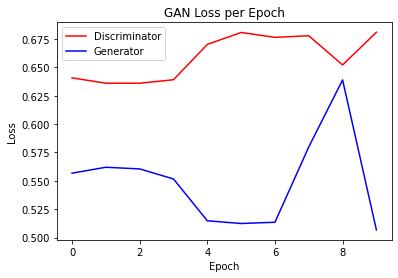

In [9]:
gan.train(items, itemsTest, itemsVal, epochs=10, start_epoch=0, batch_size=128, sample_interval=1, save_interval=10)

010 Epoch 21:43:55:                                      
    [D loss: 0.69590, real_acc.: 48.065% fake_acc.: 67.368%, val_loss: 0.65824, val_real_acc.: 30.208%, val_fake_acc.: 93.750%] 
    [G loss: 0.56016, val_loss: 0.60409]
011 Epoch 21:46:39:                                      
    [D loss: 0.68571, real_acc.: 6.707% fake_acc.: 96.911%, val_loss: 0.67960, val_real_acc.: 12.500%, val_fake_acc.: 98.958%] 
    [G loss: 0.62309, val_loss: 0.61139]
012 Epoch 21:49:23:                                      
    [D loss: 0.68886, real_acc.: 7.921% fake_acc.: 96.947%, val_loss: 0.68038, val_real_acc.: 5.990%, val_fake_acc.: 98.698%] 
    [G loss: 0.62603, val_loss: 0.65876]
013 Epoch 21:52:07:                                      
    [D loss: 0.69294, real_acc.: 2.560% fake_acc.: 98.618%, val_loss: 0.69212, val_real_acc.: 0.000%, val_fake_acc.: 100.000%] 
    [G loss: 0.67290, val_loss: 0.68238]
014 Epoch 21:54:52:                                      
    [D loss: 0.68857, real_acc.: 0

046 Epoch 23:22:46:                                      
    [D loss: 0.53826, real_acc.: 85.950% fake_acc.: 97.296%, val_loss: 0.53125, val_real_acc.: 89.583%, val_fake_acc.: 97.656%] 
    [G loss: 0.68631, val_loss: 0.68146]
047 Epoch 23:25:31:                                      
    [D loss: 0.53663, real_acc.: 86.839% fake_acc.: 97.236%, val_loss: 0.53919, val_real_acc.: 81.771%, val_fake_acc.: 99.740%] 
    [G loss: 0.68665, val_loss: 0.68815]
048 Epoch 23:28:17:                                      
    [D loss: 0.54055, real_acc.: 83.714% fake_acc.: 97.873%, val_loss: 0.53720, val_real_acc.: 81.771%, val_fake_acc.: 100.000%] 
    [G loss: 0.68762, val_loss: 0.69031]
049 Epoch 23:31:02:                                      
    [D loss: 0.54072, real_acc.: 82.704% fake_acc.: 98.546%, val_loss: 0.55402, val_real_acc.: 75.521%, val_fake_acc.: 98.438%] 
    [G loss: 0.68877, val_loss: 0.69170]
050 Epoch 23:33:47:                                      
    [D loss: 0.53772, real_ac

082 Epoch 01:02:15:                                      
    [D loss: 0.53546, real_acc.: 84.603% fake_acc.: 99.087%, val_loss: 0.52865, val_real_acc.: 86.719%, val_fake_acc.: 100.000%] 
    [G loss: 0.68984, val_loss: 0.69175]
083 Epoch 01:05:01:                                      
    [D loss: 0.53580, real_acc.: 84.363% fake_acc.: 99.063%, val_loss: 0.53986, val_real_acc.: 80.990%, val_fake_acc.: 100.000%] 
    [G loss: 0.69027, val_loss: 0.69305]
084 Epoch 01:07:47:                                      
    [D loss: 0.53436, real_acc.: 84.880% fake_acc.: 99.243%, val_loss: 0.53241, val_real_acc.: 85.156%, val_fake_acc.: 99.740%] 
    [G loss: 0.69048, val_loss: 0.69101]
085 Epoch 01:10:35:                                      
    [D loss: 0.53303, real_acc.: 85.312% fake_acc.: 99.387%, val_loss: 0.52843, val_real_acc.: 86.979%, val_fake_acc.: 99.740%] 
    [G loss: 0.69149, val_loss: 0.69209]
086 Epoch 01:13:22:                                      
    [D loss: 0.53112, real_a

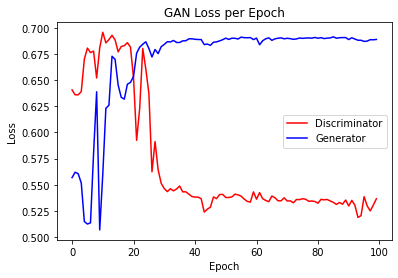

In [11]:
gan.train(items, itemsTest, itemsVal, epochs=90, start_epoch=10, batch_size=128, sample_interval=1, save_interval=10)

In [ ]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

In [1]:
!tensorboard --logdir ./logs/GAN_2020-12-08_21-06 --port 8022

^C


In [45]:
fd.saveFolder(gan.generateScaled(25), "saved/")